# Sentence Transformers (SBERT) - Overview + Finetuning
Notebook by Adam Lang
* Date: February 20, 2024
* original paper: https://arxiv.org/pdf/1908.10084.pdf
* UKPLab github: https://github.com/UKPLab/sentence-transformers

## Overview of the paper
* BERT uses cross-encoder.
* 2 sentences passed to transformer network => target value predicted.
* Due to infinite permutations, a modern GPU could take 65 hours to compute 10,000 sentence combinations.
* SBERT addresses these issues
1. siamese network architecture
2. fixed-size vectors derived using similarity measures (cosine, manhattan/euclidean)
3. SBERT is faster => 10,000 sentences in less than 5 seconds.
4. SBERT can be fine tuned for specific task(s).
5. SBERT gives a pair of sentences 1 similarity score not 2.


How architecture works
* Sentence A, Sentence B passed to BERT model
* If max length is 100 => obtain 100 x 768 embeddings due to max sequence length of 768.
* Apply pooling => take average of embeddings
* pooling output => u and v vectors
* minimize loss function (softmax classifier)
image from original paper by Nils Reimers:

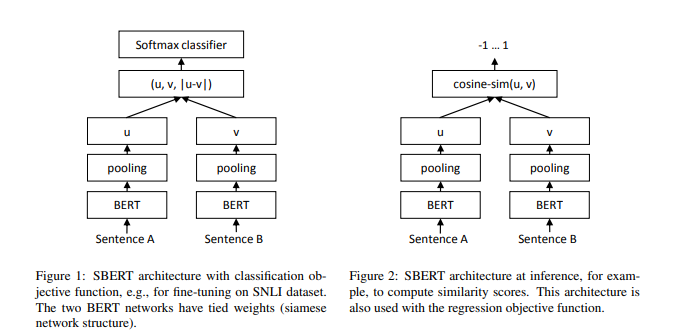

### Quick start

In [9]:
# install
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.5 MB/s eta 0:00:00


### Example usage - pretrained model

In [10]:
from sentence_transformers import SentenceTransformer

#instantiate a model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Sentences to encode
* sample sentences taken from RSNA sample documentation: https://www.rsna.org/-/media/Files/RSNA/Covid-19/RSNA-COVID19ChestCT-ReportExample

In [11]:
# sentences
sentences = ['Multifocal rounded ground-glass opacities in a peripheral distribution with scattered areas of intralobular line',
             'Multifocal, peripherally distributed, rounded ground-glass opacities with additional scattered areas of crazy paving and organizing pneumonia, typical for COVID-19 pneumonia.',
             'Multifocal, randomly distributed, nonrounded ground-glass opacities, nonspecific and likely infectious or inflammatory.']

# encode sentences
embeddings = model.encode(sentences)


# print embeddings
for sentence, embedding in zip(sentences, embeddings):
  print('Sentence:', sentence)
  print("Embedding:", embedding)
  print("")

Sentence: Multifocal rounded ground-glass opacities in a peripheral distribution with scattered areas of intralobular line
Embedding: [ 0.22283556 -0.11105761  0.36559454  0.09611338 -0.35263166 -0.09003917
  0.18517138 -0.01000087 -0.19246244 -0.29358828  0.09462733  0.06546091
  0.15985031  0.12947    -0.12621374  0.06167477 -0.5088064  -0.06091828
 -0.07639404  0.34217468  0.21601366 -0.01670589  0.03536245 -0.29156762
 -0.14730604 -0.08786579 -0.17988606 -0.2379755   0.02520891 -0.06723294
  0.0333044   0.66404635  0.28548577 -0.14429738  0.1580477  -0.34552824
 -0.03977967  0.21638894  0.17642884 -0.15631048 -0.15373914  0.08999256
 -0.05944139  0.05238697  0.56256056 -0.07492057 -0.11275879 -0.0666903
 -0.05926013  0.16924845  0.03491752 -0.21312912 -0.41356733  0.18791248
  0.06689165  0.39423153  0.0196172   0.21142979  0.17092669  0.30836055
  0.43364695  0.05628796 -0.29171157  0.41616997  0.15800987  0.05713564
  0.1874965  -0.12784855 -0.1865995   0.061592    0.31281567  0.

### Compare sentences with cosine similarity

In [13]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

#encode sentences
emb1 = model.encode("Multifocal rounded ground-glass opacities in a peripheral distribution with scattered areas of intralobular line.")
emb2 = model.encode("Multifocal, randomly distributed, nonrounded ground-glass opacities, nonspecific and likely infectious or inflammatory.")

#cosine similarity
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.5501]])


# Fine-tuning sentence transformers on custom data
* First we will use the Stanford NLI dataset and the MNLI datasets.
* The SNLI is a collection of 570,000 sentence pairs annotated with
the labels contradiction, eintailment, and neutral. MultiNLI contains 430,000 sentence pairs and covers a range of genres of spoken and written
text.

Overview of the labels:
* 0 - entailment (premise suggests hypothesis)
* 1 - neutral (premise and hypothesis could both be true)
* 2 - contradiction (contradiction, premise and hypothesis contradict each other)

In [16]:
#import huggingface datasets
import datasets

In [18]:
# download snli datasets
snli = datasets.load_dataset('snli', split = 'train')


# print snli
snli



Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 550152
})

In [19]:
# look at first row
snli[0]

{'premise': 'A person on a horse jumps over a broken down airplane.',
 'hypothesis': 'A person is training his horse for a competition.',
 'label': 1}

In [20]:
# view another
snli[1]

{'premise': 'A person on a horse jumps over a broken down airplane.',
 'hypothesis': 'A person is at a diner, ordering an omelette.',
 'label': 2}

In [21]:
# view another
snli[2]

{'premise': 'A person on a horse jumps over a broken down airplane.',
 'hypothesis': 'A person is outdoors, on a horse.',
 'label': 0}

In [22]:
# import the mnli dataset
mnli = datasets.load_dataset('glue', 'mnli', split = 'train')

# print
mnli

Dataset({
    features: ['premise', 'hypothesis', 'label', 'idx'],
    num_rows: 392702
})

In [23]:
# remove 'idx' col to concat datasets
mnli = mnli.remove_columns(['idx'])
mnli

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 392702
})

In [24]:
# concat datasets
dataset = datasets.concatenate_datasets([snli, mnli])


In [26]:
dataset

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 942854
})

In [27]:
# remove -1 values
dataset = dataset.filter(
    lambda x: False if x['label'] == -1 else True
)

dataset

Filter:   0%|          | 0/942854 [00:00<?, ? examples/s]

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 942069
})

In [30]:
dataset

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 942069
})